# Uber Data Analytics 

## Objectives
- Data Transformation on Uber Dataset in Python
- Create a dashboard on Power BI

## Dataset
The dataset used for this project is taken from Uber trip records of NYC's Taxi and Limousine Commission (TLC) that can be accessed using this [Link](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). <br />

A subset of the data consisting 100k trips is used for this project - [Dataset](https://www.kaggle.com/datasets/praveenluppunda/uber-dataset)

Data Dictionary for Yellow Taxi Trip data - https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

## Tech Stack
### Language Used

- Python

### Tools Used

- Power BI

# Approach
## 1. Data Acquisition
The dataset is taken from Uber trip records of NYC's Taxi and Limousine Commission (TLC). Only a subset of the data consisting 100k trips is used for analysis.

## 2. Data Modeling
The flat file obtained as data set will be converted to Fact Table and Dimension Table.

### Fact Table
- Has quantitative measures used for analysis.
- Contains references to Dimension table.
- Has columns with high cardinality and changes frequently.
- Contains columns which are not useful for analysis by themselves but are necessary for calculating metrics.

### Dimension Table
- Contains columns which describe attributes of data being analyzed.
- Has Primary Keys that links fact table.
- Has columns with low cardinality and doesn't change frequently.
- Contains columns which are used for grouping or filtering data for analysis.

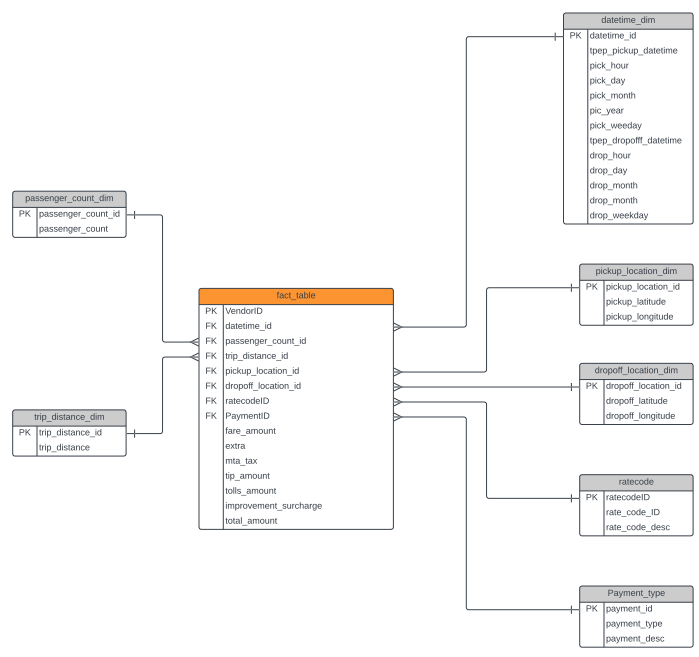

### 3. Data Transformation
Transformation of the loaded data as per our requirement is done using MAGE Transformation block.
Some of the transformation done include:

- Data Cleaning
- Dropping duplicates and resetting indexes.
- Converting the columns storing date values/timestamp in the DataFrame to datetime type.
- Developing Dimension Tables and Fact Table. Once all the dimension tables are created, to create a fact table we merge the main dataframe on all of the dimension tables based on the common key present between them.

### 4. Dashboard Development on Power BI
....

# Code

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Data/uber_data.csv")
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,6.20,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,7.18,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

#### Converting pickup and dropoff columns type to datetime

In [4]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

#### Dropping duplicates and resetting the index

In [5]:
df = df.drop_duplicates().reset_index(drop = True)
df['trip_id'] = df.index
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,99995
99996,1,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,99996
99997,1,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,99997
99998,2,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,99998


#### Dimension table for datetime columns and computing other datetime values

In [6]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].drop_duplicates().reset_index(drop = True)

# Pickup Time
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday


# Dropoff Time
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday
datetime_dim

,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,2016-03-01 00:00:00,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1
1,2016-03-01 00:00:00,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1
2,2016-03-01 00:00:00,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1
3,2016-03-01 00:00:00,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1
4,2016-03-01 00:00:01,2016-03-01 00:16:04,0,1,3,2016,1,0,1,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99848,2016-03-01 06:17:10,2016-03-01 06:22:15,6,1,3,2016,1,6,1,3,2016,1
99849,2016-03-01 06:17:10,2016-03-01 06:32:41,6,1,3,2016,1,6,1,3,2016,1
99850,2016-03-01 06:17:10,2016-03-01 06:37:23,6,1,3,2016,1,6,1,3,2016,1
99851,2016-03-01 06:17:10,2016-03-01 06:22:09,6,1,3,2016,1,6,1,3,2016,1


In [7]:
datetime_dim['datetime_id'] = datetime_dim.index
datetime_dim = datetime_dim[['datetime_id','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pick_hour',
       'pick_day', 'pick_month', 'pick_year', 'pick_weekday', 'drop_hour',
       'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
datetime_dim

,datetime_id,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01 00:00:00,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1
3,3,2016-03-01 00:00:00,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1
4,4,2016-03-01 00:00:01,2016-03-01 00:16:04,0,1,3,2016,1,0,1,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99848,99848,2016-03-01 06:17:10,2016-03-01 06:22:15,6,1,3,2016,1,6,1,3,2016,1
99849,99849,2016-03-01 06:17:10,2016-03-01 06:32:41,6,1,3,2016,1,6,1,3,2016,1
99850,99850,2016-03-01 06:17:10,2016-03-01 06:37:23,6,1,3,2016,1,6,1,3,2016,1
99851,99851,2016-03-01 06:17:10,2016-03-01 06:22:09,6,1,3,2016,1,6,1,3,2016,1


In [23]:
datetime_dim.to_csv('datetime_dim.csv', index=False, header=True)

#### Dimension table of passenger count

In [8]:
passenger_count_dim = df[['passenger_count']].drop_duplicates().reset_index(drop = True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]
passenger_count_dim

,passenger_count_id,passenger_count
0,0,1
1,1,2
2,2,3
3,3,5
4,4,6
5,5,4
6,6,0


In [24]:
passenger_count_dim.to_csv('passenger_count_dim.csv', index=False, header=True)

#### Dimension table of Trip distance

In [9]:
trip_distance_dim = df[['trip_distance']].drop_duplicates().reset_index(drop = True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]
trip_distance_dim

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43
...,...,...
2298,2298,23.38
2299,2299,15.91
2300,2300,21.11
2301,2301,20.63


In [25]:
trip_distance_dim.to_csv('trip_distance_dim.csv', index=False, header=True)

#### Dimension table of Payment Type

Payment Type is a categorical variable. Hence, we use map method to assign a value/description to each code.

In [10]:
payment_mode_type = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

payment_type_dim = df[['payment_type']].drop_duplicates().reset_index(drop = True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_desc'] = payment_type_dim['payment_type'].map(payment_mode_type)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_desc']]
payment_type_dim

,payment_type_id,payment_type,payment_type_desc
0,0,1,Credit card
1,1,2,Cash
2,2,3,No charge
3,3,4,Dispute


In [26]:
payment_type_dim.to_csv('payment_type_dim.csv', index=False, header=True)

#### Dimension table of Rate Code

Rate Code is a categorical variable. Hence, we use map method to assign a value/description to each code.

In [11]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].drop_duplicates().reset_index(drop = True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_desc'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_desc']]
rate_code_dim

,rate_code_id,RatecodeID,rate_code_desc
0,0,1,Standard rate
1,1,3,Newark
2,2,2,JFK
3,3,5,Negotiated fare
4,4,4,Nassau or Westchester
5,5,6,Group ride


In [27]:
rate_code_dim.to_csv('rate_code_dim.csv', index=False, header=True)

#### Dimension table of Dropoff Location

In [12]:
dropoff_location_dim = df[['dropoff_latitude','dropoff_longitude']].drop_duplicates().reset_index(drop = True)
dropoff_location_dim['dropoff_loc_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_loc_id','dropoff_latitude','dropoff_longitude']]
dropoff_location_dim

,dropoff_loc_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170
...,...,...,...
98412,98412,40.750462,-73.998245
98413,98413,40.752529,-73.982361
98414,98414,40.770512,-73.865028
98415,98415,40.759148,-73.970695


In [28]:
dropoff_location_dim.to_csv('dropoff_location_dim.csv', index=False, header=True)

#### Dimension table of Pickup Location

In [13]:
pickup_location_dim = df[['pickup_latitude','pickup_longitude']].drop_duplicates().reset_index(drop = True)
pickup_location_dim['pickup_loc_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_loc_id','pickup_latitude','pickup_longitude']]
pickup_location_dim

,pickup_loc_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741
...,...,...,...
98050,98050,40.750519,-73.990898
98051,98051,40.718296,-74.014488
98052,98052,40.774097,-73.963379
98053,98053,40.763111,-73.984901


In [29]:
pickup_location_dim.to_csv('pickup_location_dim.csv', index=False, header=True)

***Once all the dimension tables are created, to create a fact table we merge the main dataframe on all of the dimension tables based on the common key present between them.***

In [14]:
fact_table = df.merge(passenger_count_dim, on = 'passenger_count') \
             .merge(trip_distance_dim, on = 'trip_distance') \
             .merge(rate_code_dim , on = 'RatecodeID') \
             .merge(pickup_location_dim, on = ['pickup_longitude','pickup_latitude']) \
             .merge(dropoff_location_dim, on = ['dropoff_longitude', 'dropoff_latitude']) \
             .merge(datetime_dim, on = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']) \
             .merge(payment_type_dim, on = ['payment_type']) \
             [['trip_id','VendorID','datetime_id','passenger_count_id','trip_distance_id','rate_code_id','store_and_fwd_flag','pickup_loc_id','dropoff_loc_id','payment_type_id','fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge','total_amount']]

In [30]:
fact_table.to_csv('fact_table.csv', index=False, header=True)